In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

# Load Data

In [2]:
df = pd.read_csv("Dropout_Academic_Success.csv")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Pre-Process

In [3]:
filtered_df = df[df["Age at enrollment"].astype(int) <= 40]

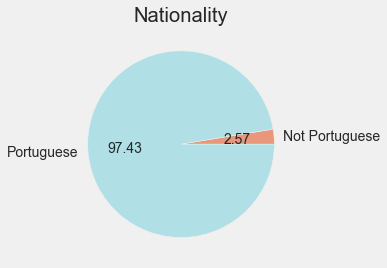

In [4]:
labels, counts = np.unique(filtered_df["Nacionality"], return_counts=True)

new_labels, new_counts = ["Not Portuguese", "Portuguese"], [sum(counts[labels != 1]), sum(counts[labels == 1])]
plt.pie(new_counts, labels=new_labels, autopct='%.2f', colors=["darksalmon", "powderblue"])
plt.title("Nationality")
plt.show()

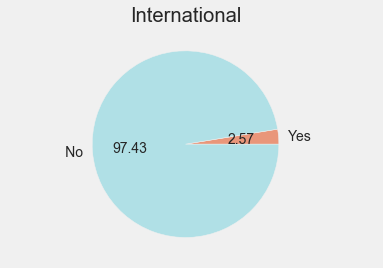

In [5]:
labels, counts = np.unique(filtered_df["International"], return_counts=True)
counts = list(counts)
counts.reverse()
plt.pie(counts, labels=["Yes                 ", "               No"], autopct='%.2f', colors=["darksalmon", "powderblue"])
plt.title("International")
plt.show()

In [6]:
filtered_df = filtered_df[filtered_df["Nacionality"] == 1]
filtered_df = filtered_df[filtered_df["International"] == 0]
filtered_df = filtered_df.drop(["Nacionality", "International"], axis=1)

In [7]:
drop_columns = ["Application mode", "Debtor", "Tuition fees up to date", "Curricular units 1st sem (credited)",
                "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (evaluations)",
                "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)",
                "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)",
                "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)",
                "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)",
                "Curricular units 2nd sem (without evaluations)", "Unemployment rate", "Inflation rate", "GDP"]
filtered_df = filtered_df.drop(drop_columns, axis=1)
filtered_df

,Marital status,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Gender,Scholarship holder,Age at enrollment,Target
0,1,5,171,1,1,122.0,19,12,5,9,127.3,1,0,1,0,20,Dropout
1,1,1,9254,1,1,160.0,1,3,3,3,142.5,1,0,1,0,19,Graduate
2,1,5,9070,1,1,122.0,37,37,9,9,124.8,1,0,1,0,19,Dropout
3,1,2,9773,1,1,122.0,38,37,5,3,119.6,1,0,0,0,20,Graduate
6,1,1,9500,1,1,142.0,19,38,7,10,128.4,1,0,0,1,18,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,1,1,9070,1,1,132.0,1,1,9,9,133.8,1,0,0,1,20,Graduate
4418,1,1,9070,1,39,120.0,3,38,3,9,120.0,0,0,1,0,20,Graduate
4419,1,6,9773,1,1,125.0,1,1,5,4,122.2,0,0,1,0,19,Graduate
4421,1,1,9500,1,1,154.0,37,37,9,9,149.5,1,0,0,1,30,Dropout


In [8]:
separate_age = 21
df_adult = df[df["Age at enrollment"] >= separate_age]
df_minor = df[df["Age at enrollment"] < separate_age]

filtered_df_adult = filtered_df[filtered_df["Age at enrollment"] >= separate_age]
filtered_df_minor = filtered_df[filtered_df["Age at enrollment"] < separate_age]

# Analyzing the data

### Before filter

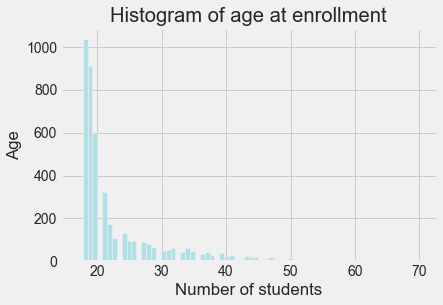

In [16]:
ages = np.array(df["Age at enrollment"])
plt.hist(ages, bins=70)
plt.ylabel("Age")
plt.xlabel("Number of students")
plt.title("Histogram of age at enrollment")
plt.show()

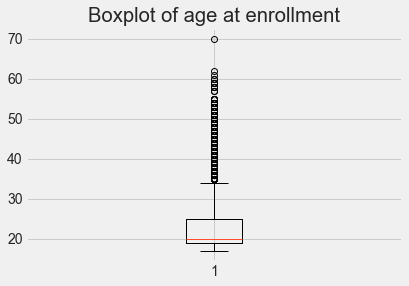

In [10]:
plt.boxplot(ages)
plt.title("Boxplot of age at enrollment")
plt.show()

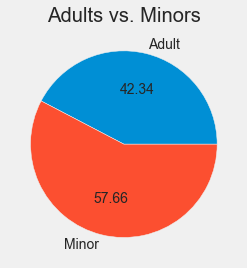

In [11]:
plt.pie([len(df_adult), len(df_minor)], labels=["Adult", "Minor"], autopct='%.2f')
plt.title("Adults vs. Minors")
plt.show()

### After filter

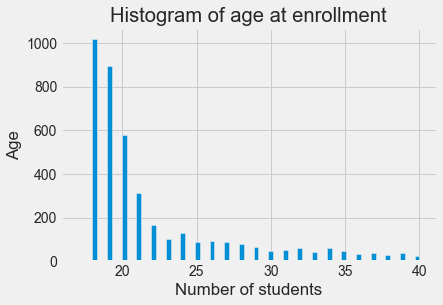

In [12]:
ages = np.array(filtered_df["Age at enrollment"])
plt.hist(ages, bins=70)
plt.ylabel("Age")
plt.xlabel("Number of students")
plt.title("Histogram of age at enrollment")
plt.show()

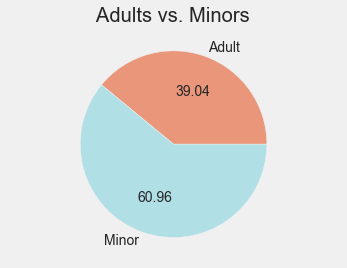

In [13]:
plt.pie([len(filtered_df_adult), len(filtered_df_minor)], labels=["Adult", "Minor"], autopct='%.2f', colors=["darksalmon", "powderblue"])
plt.title("                Adults vs. Minors                ")
plt.show()

Marital status


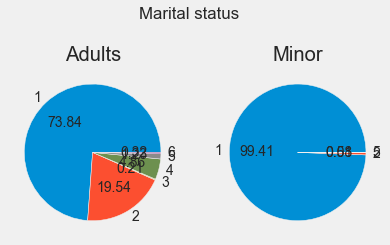

Application order


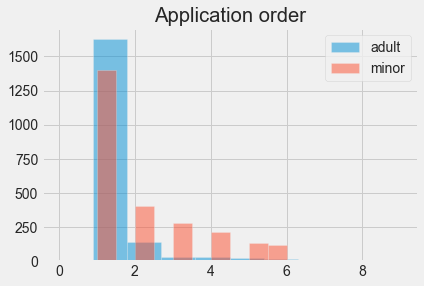

Course


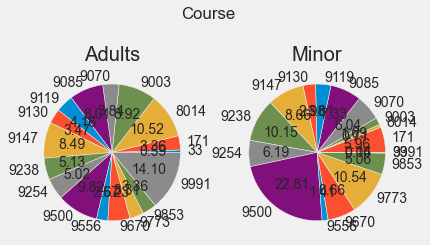

Daytime/evening attendance


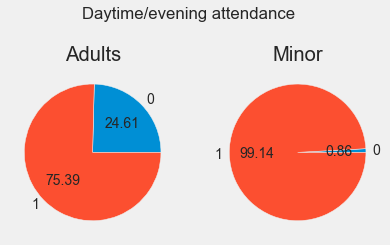

Previous qualification


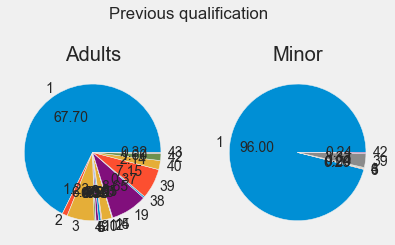

Previous qualification (grade)


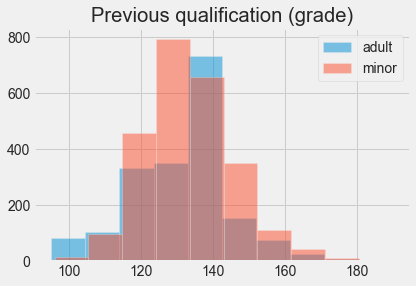

Nacionality


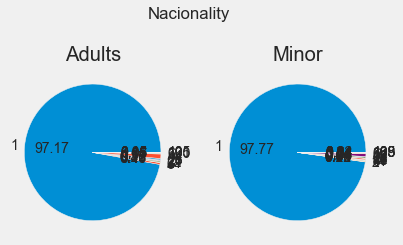

Mother's qualification


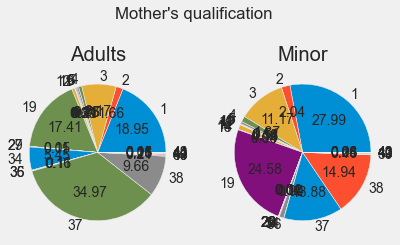

Father's qualification


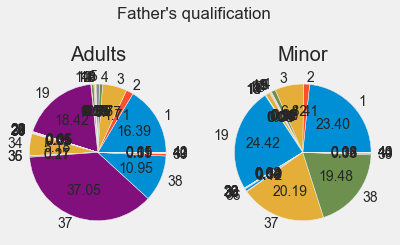

Mother's occupation


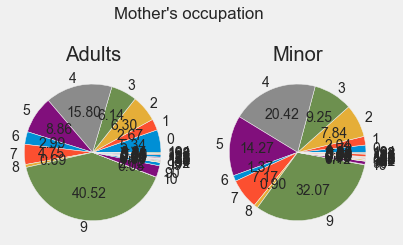

Father's occupation


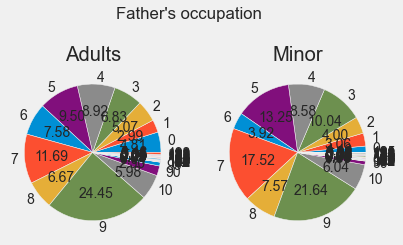

Admission grade


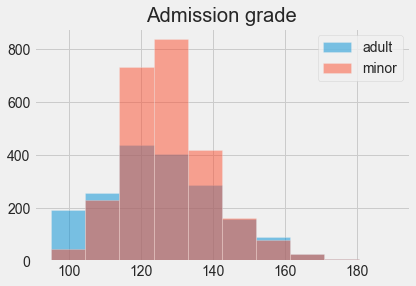

Displaced


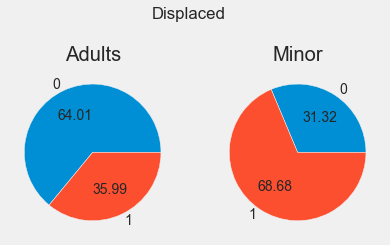

Educational special needs


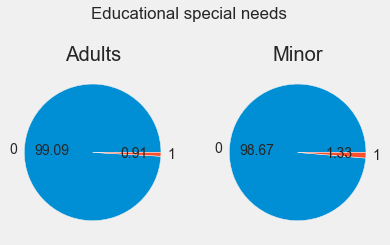

Gender


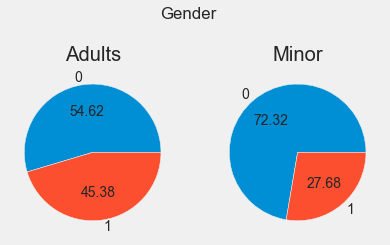

Scholarship holder


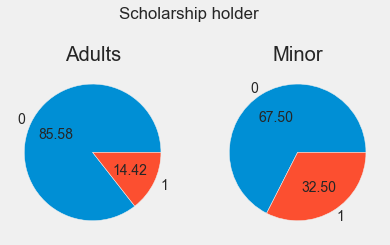

Age at enrollment


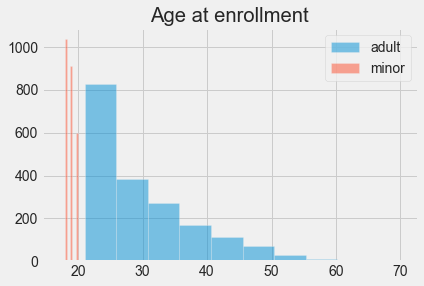

International


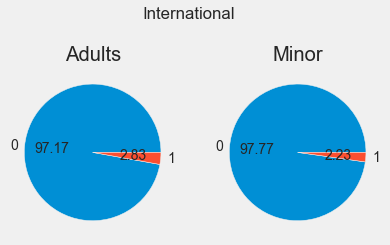

Target


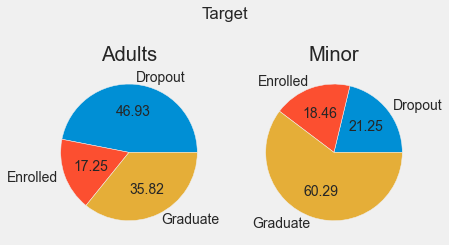

In [14]:
not_ordered = [""]
pie = ["Marital status", "Application mode", "Course", "Daytime/evening attendance", "Previous qualification",
       "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Displaced",
       "Educational special needs", "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder",
       "International", "Target", "Nacionality"]
for feature in df.columns:
    if feature in drop_columns:
        continue
    print(feature)
    if feature in not_ordered:
        plt.hist(df_adult[feature].astype(str), alpha=0.5, label="adult")
        plt.hist(df_minor[feature].astype(str), alpha=0.5, label="minor")
        plt.title(feature)
        plt.legend()

    elif feature in pie:
        labels_adult, counts_adult = np.unique(df_adult[feature], return_counts=True)
        labels_minor, counts_minor = np.unique(df_minor[feature], return_counts=True)
        fig, axs = plt.subplots(1, 2)
        fig.suptitle(feature)
        axs[0].pie(counts_adult, labels=labels_adult, autopct='%.2f')  #, colors=["b","g","r"])
        axs[0].set_title("Adults")
        axs[1].pie(counts_minor, labels=labels_minor, autopct='%.2f')  #, colors=["b","g","r"])
        axs[1].set_title("Minor")
    else:
        plt.hist(df_adult[feature], alpha=0.5, label="adult")
        plt.hist(df_minor[feature], alpha=0.5, label="minor")
        plt.title(feature)
        plt.legend()
    plt.show()

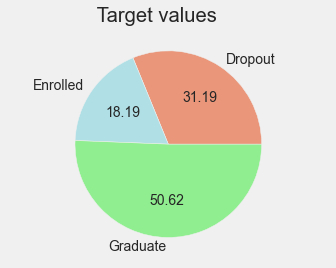

In [15]:
labels, counts = np.unique(filtered_df["Target"], return_counts=True)
plt.pie(counts, labels=labels, autopct='%.2f', colors=["darksalmon", "powderblue","lightgreen"])
plt.title("                Target values                    ")
plt.show()